### Simple Linear Regression
Using sklearn and OLS method to predict the hegiht on the basis of weight 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
data = pd.read_csv("data/height-weight.csv")
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

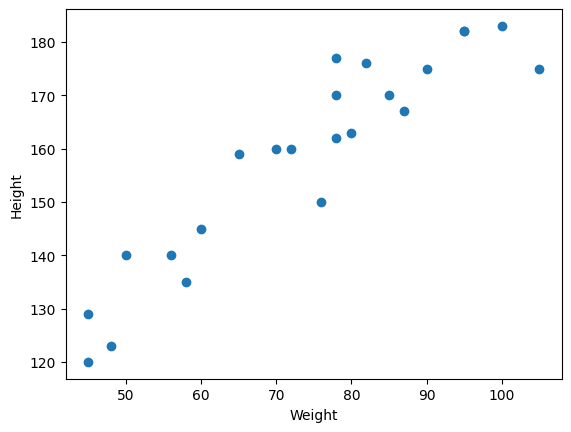

In [96]:
plt.scatter(data['Weight'], data['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

##### Independed and dependent features

In [97]:
X = data[["Weight"]]
y = data["Height"]

##### Dividing the data into training and testing data

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train ,Y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

##### Standardizing

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [100]:
X_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

In [101]:
X_test

array([[ 0.2785895 ],
       [ 0.2785895 ],
       [-1.70918423],
       [ 1.30259415],
       [-0.50447288],
       [ 1.90494982],
       [-0.92612185]])

##### Building the model

In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, Y_train)
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Plotting best fit line

Text(0, 0.5, 'Height')

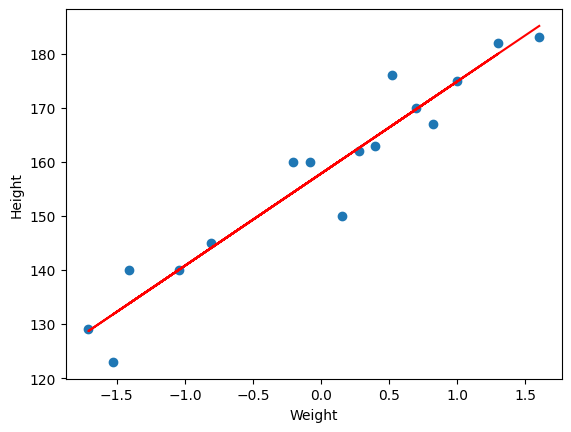

In [103]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel("Weight")
plt.ylabel("Height")


##### Testing the data

In [104]:
pred = regressor.predict(X_test)
pred

array([162.55745791, 162.55745791, 128.70154204, 179.99838426,
       149.22027893, 190.25775271, 142.03872102])

##### Calculating the errors

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

9.237776679921925
103.09818711844574
10.153727744944009


##### R square score

In [106]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, pred)
score

0.7828485570493535

##### Adjusted R2 score

In [107]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7394182684592242

##### Linear regression using OLS technique


In [108]:
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [109]:
prediction = model.predict(X_test)
prediction

array([  4.74495791,   4.74495791, -29.11095796,  22.18588426,
        -8.59222107,  32.44525271, -15.77377898])

In [114]:
model.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.1745
Date:                Sun, 01 Feb 2026   Prob (F-statistic):                       0.682
Time:                        12:34:31   Log-Likelihood:                         -103.69
No. Observations:                  16   AIC:                                      209.4
Df Residuals:                      15   BIC:                                      210.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0321     40.767      0.418      0.682     -69.861     103.925
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.320
Skew:                          -0.347   Prob(JB):                        0.852
Kurtosis:                       2.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
regressor.coef_

array([17.03207732])

In [113]:
regressor.predict(scaler.transform([[72]]))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.40183684])